In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-dark")
plt.rcParams["font.family"] = "monospace"

In [2]:
lenna = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
lenna = cv2.cvtColor(lenna, cv2.COLOR_RGB2HSV)
lenna.shape

(512, 512, 3)

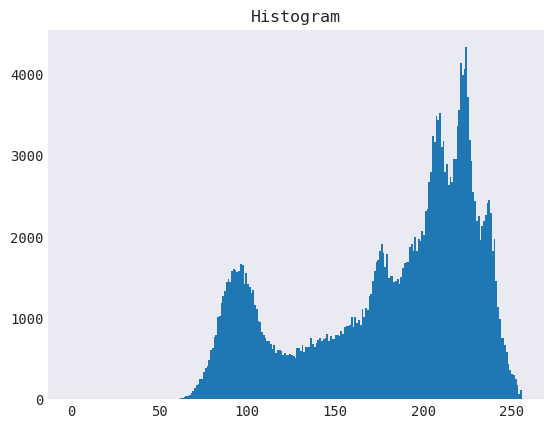

In [3]:
intensity = lenna[:,:,2]
plt.hist(
    intensity.flatten(),
    bins = 256,
    range = [0, 256]
);
plt.title("Histogram");

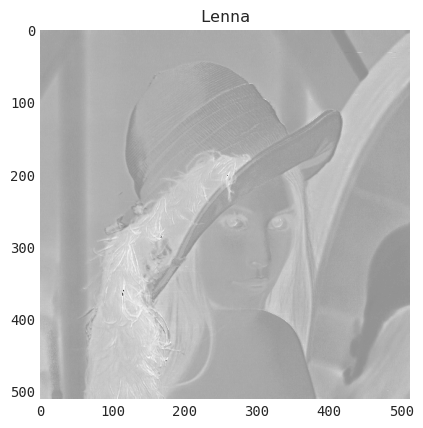

In [5]:
plt.imshow(lenna[:,:,0], cmap = "gray");
1plt.title("Lenna");